# CIFAR-10 Classification with Supervised Machine Learning

## Project Description

This Supervised machine learning project is done for classification of Keras CIFAR-10 dataset as part of __DTSA-5509 Introduction to Machine Learning__ course for Master of Science in Data Science from __University of Colorado, Boulder__. 

## Problem Description

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

The classes are:

- Airplane
- Automobile
- Bird
- Cat
- Deer
- Dog
- Frog
- Horse
- Ship
- Truck


## Project Goal

In this notebook, I’ll approach this problem of classifying CIFAR-10 dataset using supervised machine learning algorithms by following these steps:
- Load data
- Data cleanup
- Exploratory Data Analysis (EDA)
- Preprocess the data
- Build, train, and evaluate ML models
- Compare results and discuss findings
  

## Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline

# Import classifiers we'll be using
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# To suppress warnings
import warnings
warnings.filterwarnings('ignore')

## Load Data

The CIFAR-10 dataset is a classic benchmark dataset in computer vision, consisting of 60,000 32x32 color images in 10 classes, comes with Keras pacakge itself.

To load the CIFAR-10 dataset in Keras, I have used the keras.datasets.cifar10.load_data() function which automatically splits the data in Train & Test batches of 50,000 & 10,000 images respectively.

This tech report (Chapter 3) describes the dataset and the methodology followed when collecting it in much greater detail--

[Learning Multiple Layers of Features from Tiny Images](https://www.cs.toronto.edu/~kriz/learning-features-2009-TR.pdf>)

In [3]:
# Set random seed for reproducibility
np.random.seed(42)

# Load CIFAR10 dataset from keras
from keras.datasets import cifar10

# Load data
(X_train_full, y_train_full), (X_test, y_test) = cifar10.load_data()

# Convert labels from 2D to 1D arrays
y_train_full = y_train_full.reshape(-1)
y_test = y_test.reshape(-1)

# Define class names for better visualization
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

print("Basic Data statistics:")
print(f"Training data shape: {X_train_full.shape}")
print(f"Training labels shape: {y_train_full.shape}")
print(f"Test data shape: {X_test.shape}")
print(f"Test labels shape: {y_test.shape}")

# Image statistics
print("\nImage statistics:")
print("Pixel value range:", X_train_full.min(), "to", X_train_full.max())
print("Image shape:", X_train_full[0].shape)
print("Data type:", X_train_full.dtype)

Basic Data statistics:
Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000,)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000,)

Image statistics:
Pixel value range: 0 to 255
Image shape: (32, 32, 3)
Data type: uint8


## Data Cleanup

There was no data cleanup done for Keras CIFAR-10 dataset as--

__Pre-curated Dataset__: CIFAR-10 is a well-established, carefully curated benchmark dataset that has already undergone quality control. Unlike real-world datasets, it doesn't contain:

- Missing values
- Corrupted images
- Mislabeled samples 
- Inconsistent formatting


__Uniform Image Properties__: All images in CIFAR-10 have:

- Identical dimensions (32×32 pixels)
- Consistent color channels (RGB)
- Similar resolution and quality

__Built-in Train/Test Split__: The dataset comes with predefined training and testing sets, eliminating the need for manual splitting and stratification.

__Balanced Classes__: CIFAR-10 has exactly 6,000 images per class (balanced distribution), so no class imbalance handling was required.

__Nature of Image Data__: Unlike tabular data, images typically don't have issues like:

- Outliers that need removal 
- Categorical variables requiring encoding
- Date/time fields needing conversion

### Visualizing Samples

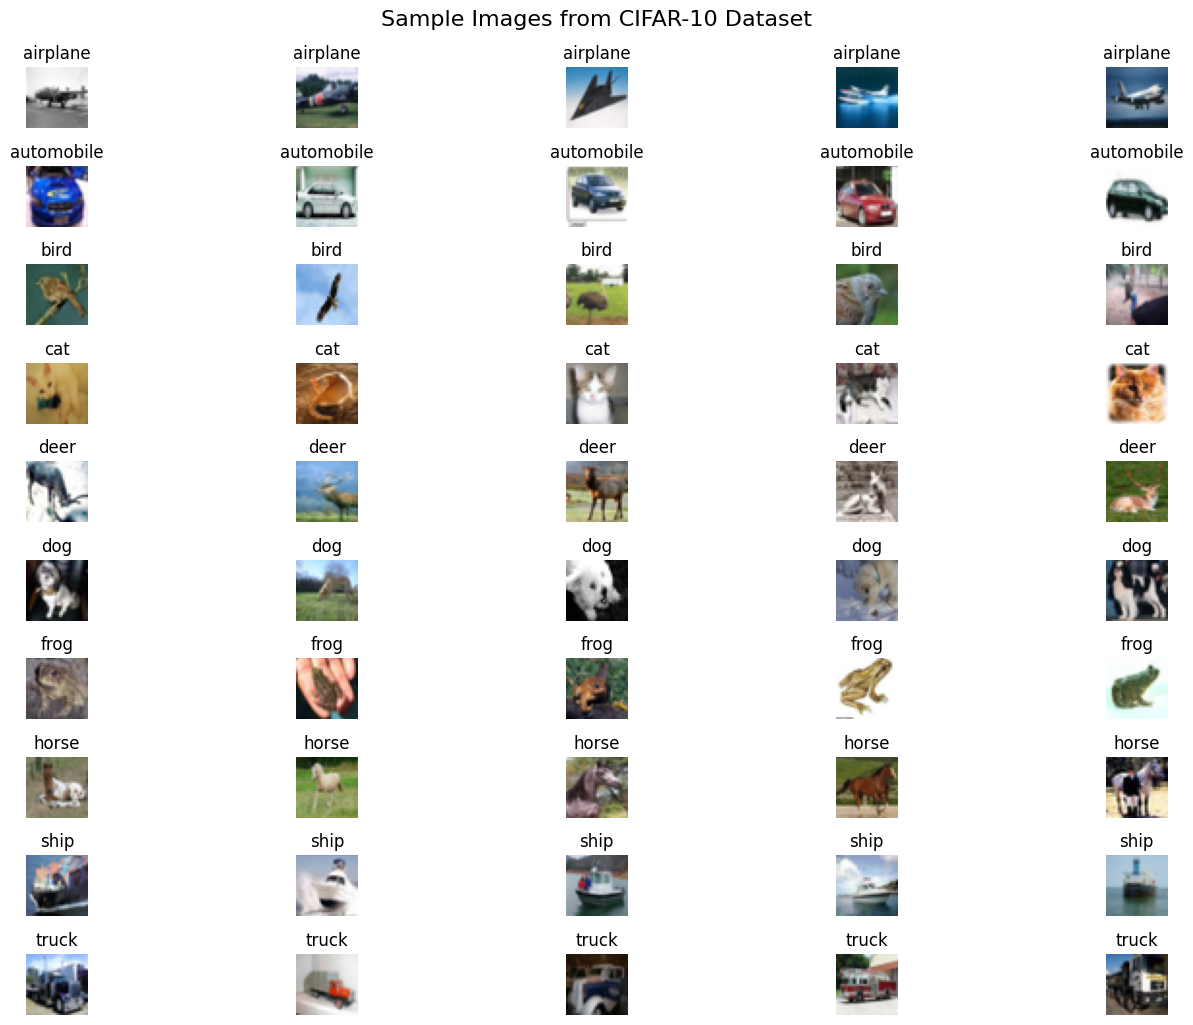

In [3]:
plt.figure(figsize=(15, 10))
for i in range(10):
    # Find indices for each class
    idx = np.where(y_train_full == i)[0]
    # Get 5 random images from each class
    sample_indices = np.random.choice(idx, 5, replace=False)
    
    for j, sample_idx in enumerate(sample_indices):
        plt.subplot(10, 5, i*5 + j + 1)
        plt.imshow(X_train_full[sample_idx])
        plt.title(f"{class_names[i]}")
        plt.axis('off')
        
plt.tight_layout()
plt.suptitle("Sample Images from CIFAR-10 Dataset", y=1.02, fontsize=16)
plt.show()

## Exploratory Data Analysis (EDA)

### Distribution of Classes

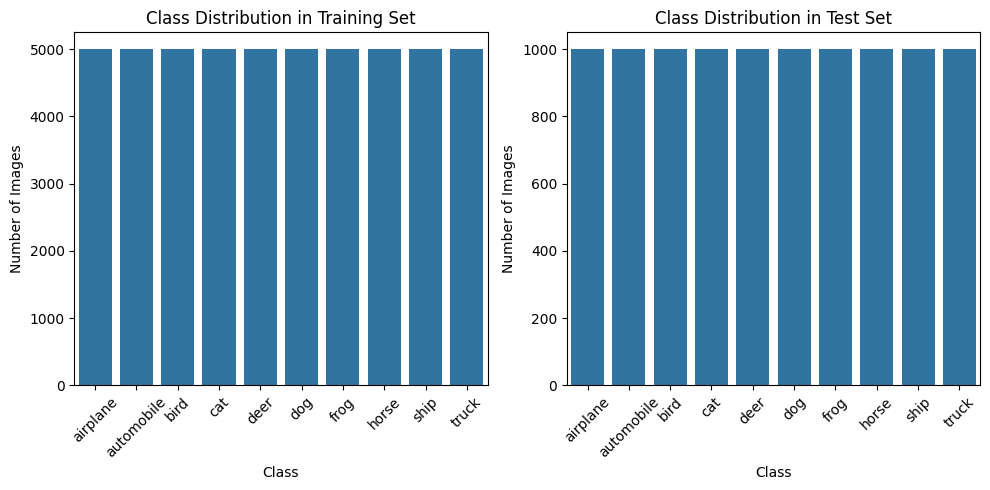

In [4]:
# Check class distribution
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.countplot(x=y_train_full)
plt.title("Class Distribution in Training Set")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.xticks(range(10), class_names, rotation=45)

plt.subplot(1, 2, 2)
sns.countplot(x=y_test)
plt.title("Class Distribution in Test Set")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.xticks(range(10), class_names, rotation=45)

plt.tight_layout()
plt.show()

__Observations__:
- Both the Train and Test set in totally balanced having same number of images for each classes. 

### Pixel Value Distribution

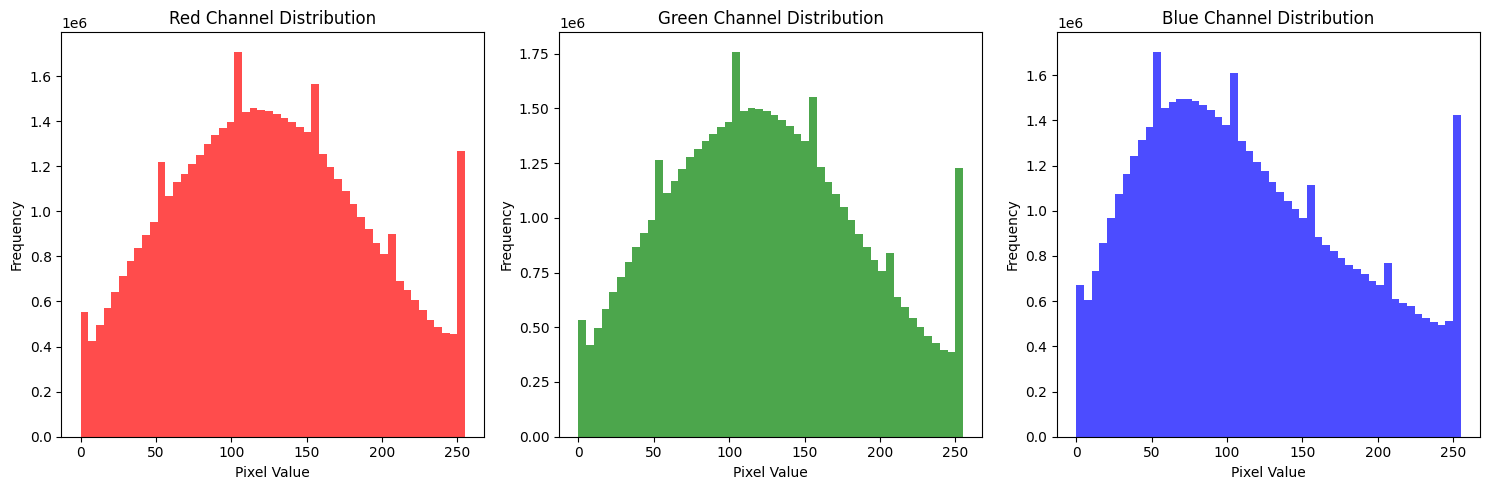

In [5]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(X_train_full[:, :, :, 0].flatten(), bins=50, color='red', alpha=0.7)
plt.title('Red Channel Distribution')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(X_train_full[:, :, :, 1].flatten(), bins=50, color='green', alpha=0.7)
plt.title('Green Channel Distribution')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(X_train_full[:, :, :, 2].flatten(), bins=50, color='blue', alpha=0.7)
plt.title('Blue Channel Distribution')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

__Observations__:
- Pixel value ranes from 0 to 255.
- All the 3 type of color (RGB) pixels are having similar distribution. 

### Mean Images of Classes

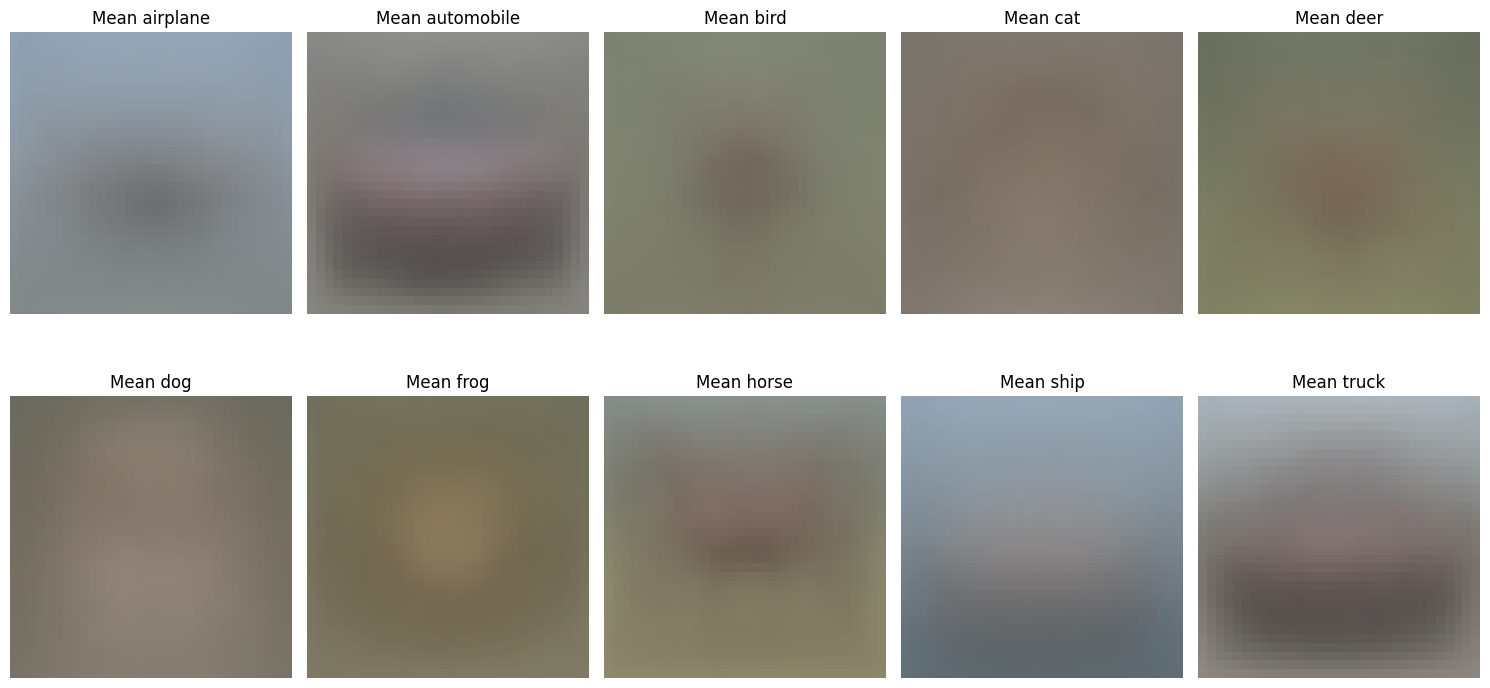

In [6]:
# Calculate mean and standard deviation for each class
class_means = []
class_stds = []

for i in range(10):
    class_images = X_train_full[y_train_full == i]
    class_mean = np.mean(class_images, axis=0)
    class_std = np.std(class_images, axis=0)
    
    class_means.append(class_mean)
    class_stds.append(class_std)

# Display mean images for each class
plt.figure(figsize=(15, 8))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(class_means[i].astype(int))
    plt.title(f"Mean {class_names[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

__Observations__:
- Mean airplane/ship images show a distinctive cruciform shape on a blue background
- Mean automobile/truck images reveal horizontal shapes with visible wheel positions
- Mean animal images (cats, dogs, deer) show basic body outlines with common postures
- The frog mean image typically shows a top-down view with a distinctive silhouette

### Pixel Correlation Analysis 

Correlation between Red and Green channels (first image): 0.9562
Correlation between Red and Blue channels (first image): 0.8439
Correlation between Green and Blue channels (first image): 0.8957


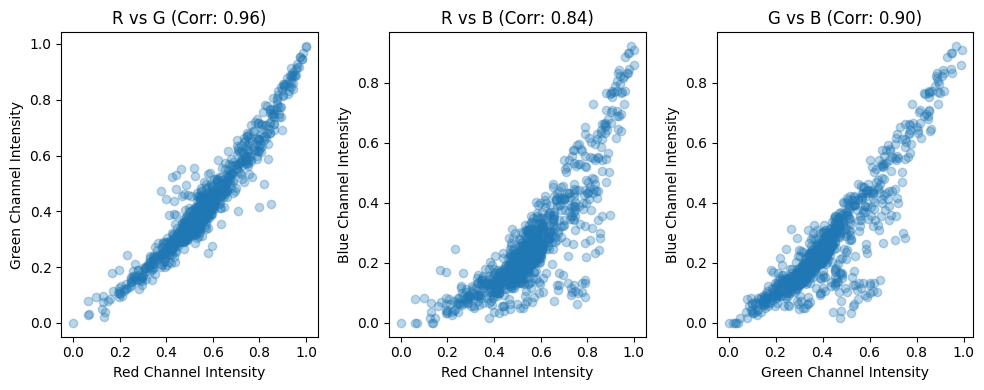

In [4]:
first_image = X_train_full[0] / 255.0  # Normalize to 0-1
red_channel = first_image[:, :, 0].flatten()
green_channel = first_image[:, :, 1].flatten()
blue_channel = first_image[:, :, 2].flatten()

correlation_rg = np.corrcoef(red_channel, green_channel)[0, 1]
correlation_rb = np.corrcoef(red_channel, blue_channel)[0, 1]
correlation_gb = np.corrcoef(green_channel, blue_channel)[0, 1]

print(f"Correlation between Red and Green channels (first image): {correlation_rg:.4f}")
print(f"Correlation between Red and Blue channels (first image): {correlation_rb:.4f}")
print(f"Correlation between Green and Blue channels (first image): {correlation_gb:.4f}")

# Visualize channel correlations for the first image
plt.figure(figsize=(10, 4))

plt.subplot(1, 3, 1)
plt.scatter(red_channel, green_channel, alpha=0.3)
plt.title(f'R vs G (Corr: {correlation_rg:.2f})')
plt.xlabel('Red Channel Intensity')
plt.ylabel('Green Channel Intensity')

plt.subplot(1, 3, 2)
plt.scatter(red_channel, blue_channel, alpha=0.3)
plt.title(f'R vs B (Corr: {correlation_rb:.2f})')
plt.xlabel('Red Channel Intensity')
plt.ylabel('Blue Channel Intensity')

plt.subplot(1, 3, 3)
plt.scatter(green_channel, blue_channel, alpha=0.3)
plt.title(f'G vs B (Corr: {correlation_gb:.2f})')
plt.xlabel('Green Channel Intensity')
plt.ylabel('Blue Channel Intensity')

plt.tight_layout()
plt.show()

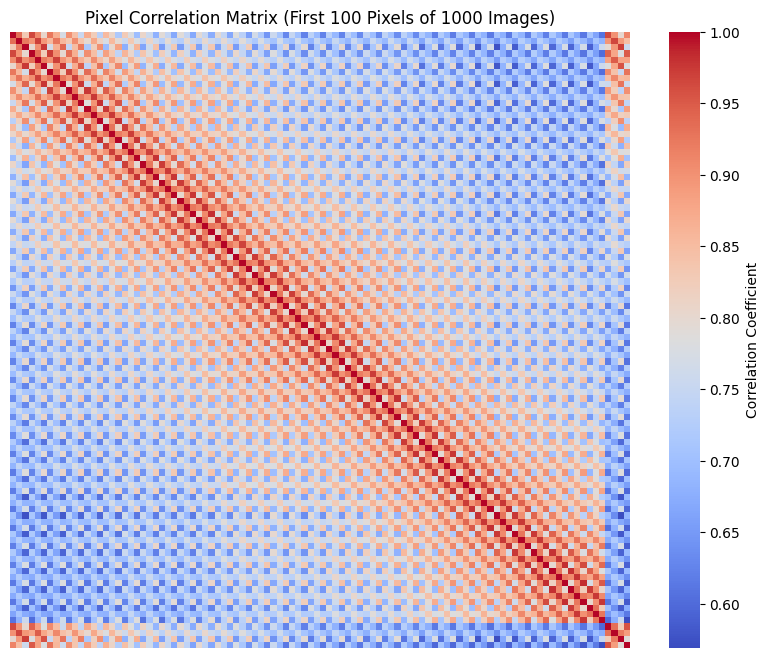

In [8]:
num_samples_corr = 1000  # Analyze a subset for efficiency
subset_images = X_train_full[:num_samples_corr].reshape(num_samples_corr, -1) / 255.0

correlation_matrix = np.corrcoef(subset_images, rowvar=False)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix[:100, :100], cmap='coolwarm',
            xticklabels=[], yticklabels=[], cbar_kws={'label': 'Correlation Coefficient'})
plt.title(f'Pixel Correlation Matrix (First 100 Pixels of {num_samples_corr} Images)')
plt.show()

## Data Preprocessing

Data Preprocessing is primarily focused into--
- Spliting the Train data further into Train and Validation Set
- Transforming the data into a format suitable for traditional ML algorithms (flattening)
- Standardizing/Scaling pixel values
- Reducing dimensionality through PCA

### Spliting, Flattening & Scaling Data

In [7]:
# split the training data further to create a validation set
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full
)

print(f"Training data shape after split: {X_train.shape}")
print(f"Validation data shape: {X_val.shape}")

# Reshape the images to vectors
X_train_flattened = X_train.reshape(X_train.shape[0], -1)
X_val_flattened = X_val.reshape(X_val.shape[0], -1)
X_test_flattened = X_test.reshape(X_test.shape[0], -1)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flattened)
X_val_scaled = scaler.transform(X_val_flattened)
X_test_scaled = scaler.transform(X_test_flattened)

print(f"\nFlattened training data shape: {X_train_scaled.shape}")
print(f"Flattened validation data shape: {X_test_scaled.shape}")
print(f"Flattened test data shape: {X_test_scaled.shape}")

Training data shape after split: (40000, 32, 32, 3)
Validation data shape: (10000, 32, 32, 3)

Flattened training data shape: (40000, 3072)
Flattened validation data shape: (10000, 3072)
Flattened test data shape: (10000, 3072)


### Dimensionality Reduction with PCA

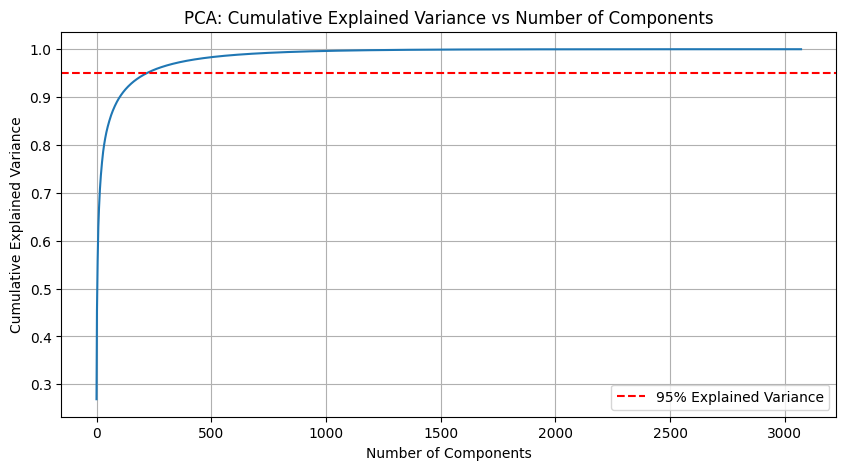

In [8]:
pca = PCA().fit(X_train_scaled)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10, 5))
plt.plot(cumulative_variance)
plt.grid(True)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA: Cumulative Explained Variance vs Number of Components')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Explained Variance')
plt.legend()
plt.show()

In [9]:
# Getting the number of components that explain 95% of variance
n_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of components explaining 95% variance: {n_components}")

# Apply PCA with the determined number of components
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"\nPCA-transformed training data shape: {X_train_pca.shape}")

Number of components explaining 95% variance: 220

PCA-transformed training data shape: (40000, 220)


__Observations__:
- After flattening and scaling the data the number of features are 3072, which is high.
- With PCA, it has been reduced to 220 featues that explains 95% of variance.

## Model Building and Training

For this CIFAR-10 classification I have used below algorithms--
- Logistic Regression
- Support Vector Machines
- Random Forest

CIFAR-10 contains exactly 5,000 images per class (10 classes total) in train set, making it perfectly balanced. In this context, __accuracy score__ provides a fair and straightforward assessment of the model perfermances since all classes contribute equally to the performance metric, without biasing results toward any particular class.

__Classification Report__ and __Confusion Matrix__ have been used to interpret each models output.

### Logistic Regression

- This algorithm serves as an excellent baseline model for CIFAR-10 classification.
- It offers interpretability and computational efficiency, making it valuable for establishing initial performance metrics.
- Logistic regression can still capture basic patterns in image data when combined with appropriate feature extraction techniques. - It also provides a good reference point to evaluate the performance gain from more complex models.


#### Model Building

In [10]:
logistic_params = {
    'C': [0.1, 1, 10],
    'solver': ['lbfgs', 'saga'],
    'max_iter': [500, 1000]
}

logistic_clf = GridSearchCV(
    LogisticRegression(),
    logistic_params,
    cv=3,
    n_jobs=-1,
    verbose=1
)

logistic_clf.fit(X_train_pca, y_train)

print("Best Logistic Regression parameters:", logistic_clf.best_params_)
print("Best CV score:", logistic_clf.best_score_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Logistic Regression parameters: {'C': 0.1, 'max_iter': 500, 'solver': 'lbfgs'}
Best CV score: 0.40374999550479984


####  Validation Set Evaluation

In [11]:
y_val_pred_logistic = logistic_clf.predict(X_val_pca)
logistic_val_accuracy = accuracy_score(y_val, y_val_pred_logistic)
print(f"Logistic Regression validation accuracy: {logistic_val_accuracy:.4f}")

Logistic Regression validation accuracy: 0.4119


####  Classification Report

In [12]:
print("Classification Report for Logistic Regression:")
print(classification_report(y_val, y_val_pred_logistic,target_names=class_names))

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

    airplane       0.45      0.48      0.46      1000
  automobile       0.45      0.49      0.47      1000
        bird       0.34      0.28      0.30      1000
         cat       0.32      0.28      0.30      1000
        deer       0.39      0.30      0.34      1000
         dog       0.34      0.34      0.34      1000
        frog       0.41      0.50      0.45      1000
       horse       0.45      0.42      0.44      1000
        ship       0.50      0.53      0.51      1000
       truck       0.44      0.49      0.46      1000

    accuracy                           0.41     10000
   macro avg       0.41      0.41      0.41     10000
weighted avg       0.41      0.41      0.41     10000



#### Confusion Matrix

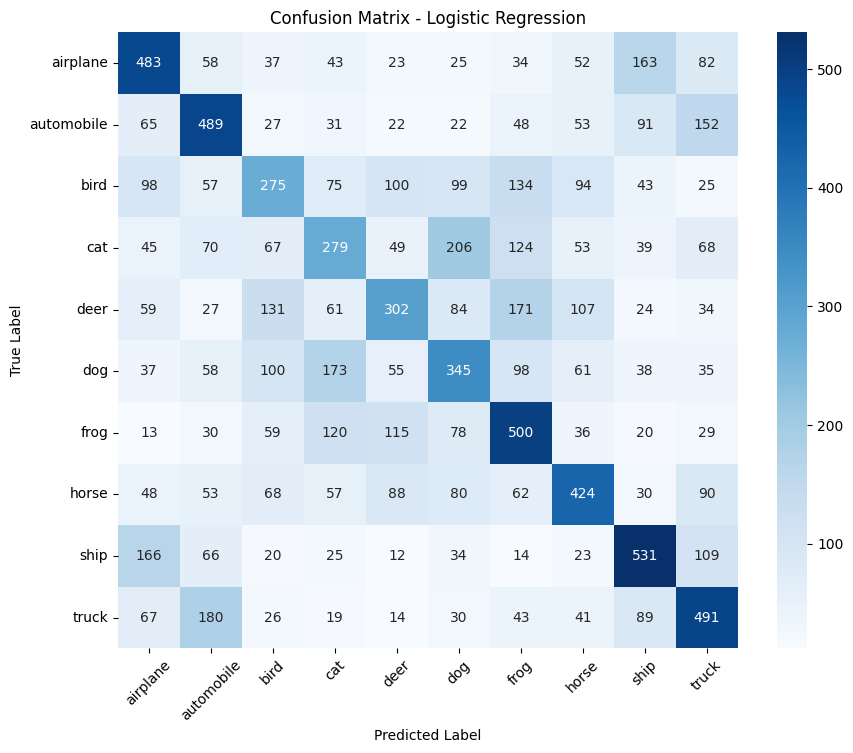

In [13]:
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_val, y_val_pred_logistic)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=45)
plt.show()

### Support Vector Machine (SVM)

- SVMs excel at finding optimal decision boundaries in high-dimensional spaces, making them particularly effective for image classification tasks like CIFAR-10.
- With appropriate kernel functions, they can model complex non-linear relationships in the data.
- SVMs are also less prone to overfitting when properly regularized, and they perform well even with a limited number of training examples per class.
- Their margin maximization approach helps improve generalization to new, unseen images.

#### Model Build

In [14]:
svm_params = {
    'C': [1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf']
}

svm_clf = GridSearchCV(
    SVC(),
    svm_params,
    cv=3,
    n_jobs=-1,
    verbose=1
)

svm_clf.fit(X_train_pca, y_train)

print("Best SVM parameters:", svm_clf.best_params_)
print("Best CV score:", svm_clf.best_score_)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best SVM parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best CV score: 0.5311001100361242


#### Validation Set Evaluation

In [15]:
y_val_pred_svm = svm_clf.predict(X_val_pca)
svm_val_accuracy = accuracy_score(y_val, y_val_pred_svm)
print(f"SVM validation accuracy: {svm_val_accuracy:.4f}")

SVM validation accuracy: 0.5601


#### Classification Report

In [16]:
print("Classification Report for SVM:")
print(classification_report(y_val, y_val_pred_svm,target_names=class_names))

Classification Report for SVM:
              precision    recall  f1-score   support

    airplane       0.61      0.65      0.63      1000
  automobile       0.63      0.66      0.64      1000
        bird       0.44      0.49      0.46      1000
         cat       0.39      0.40      0.40      1000
        deer       0.50      0.48      0.49      1000
         dog       0.49      0.46      0.48      1000
        frog       0.60      0.60      0.60      1000
       horse       0.67      0.58      0.62      1000
        ship       0.69      0.68      0.68      1000
       truck       0.61      0.60      0.61      1000

    accuracy                           0.56     10000
   macro avg       0.56      0.56      0.56     10000
weighted avg       0.56      0.56      0.56     10000



#### Confusion Matrix

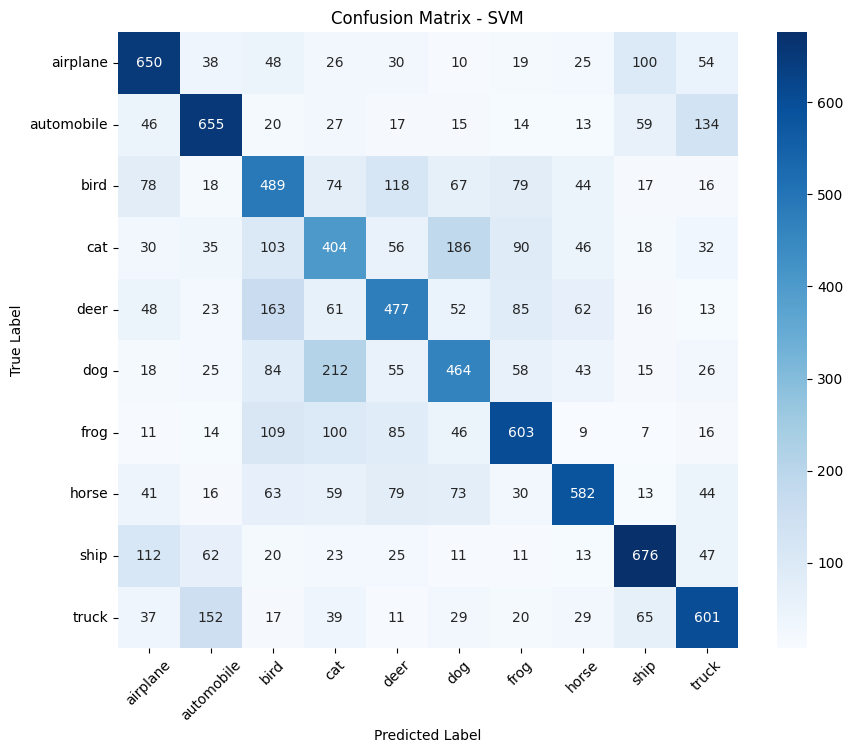

In [17]:
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_val, y_val_pred_svm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=45)
plt.show()

### Random Forest

- Random Forest is well-suited for CIFAR-10 because it handles the high-dimensional nature of image data effectively.
- Its ensemble approach combines multiple decision trees to reduce overfitting while capturing complex, non-linear relationships in the data.
- Random forests are also robust to outliers and noise, which is beneficial when working with diverse image categories.
- Additionally, they provide feature importance rankings that can offer insights into which aspects of the images are most discriminative for classification.

#### Model Build

In [18]:
rf_params = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

rf_clf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    rf_params,
    cv=3,
    n_jobs=-1,
    verbose=1
)

rf_clf.fit(X_train_pca, y_train)

print("Best Random Forest parameters:", rf_clf.best_params_)
print("Best CV score:", rf_clf.best_score_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Random Forest parameters: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 100}
Best CV score: 0.4249249942812992


#### Validation Set Evaluation

In [19]:
y_val_pred_rf = rf_clf.predict(X_val_pca)
rf_val_accuracy = accuracy_score(y_val, y_val_pred_rf)
print(f"Random Forest validation accuracy: {rf_val_accuracy:.4f}")

Random Forest validation accuracy: 0.4378


#### Classification Report

In [20]:
print("Classification Report for Random Forest:")
print(classification_report(y_val, y_val_pred_rf,target_names=class_names))

Classification Report for Random Forest:
              precision    recall  f1-score   support

    airplane       0.51      0.51      0.51      1000
  automobile       0.49      0.54      0.51      1000
        bird       0.39      0.26      0.31      1000
         cat       0.32      0.24      0.27      1000
        deer       0.41      0.40      0.40      1000
         dog       0.37      0.37      0.37      1000
        frog       0.43      0.53      0.47      1000
       horse       0.46      0.40      0.43      1000
        ship       0.51      0.62      0.56      1000
       truck       0.43      0.52      0.47      1000

    accuracy                           0.44     10000
   macro avg       0.43      0.44      0.43     10000
weighted avg       0.43      0.44      0.43     10000



#### Confusion Matrix

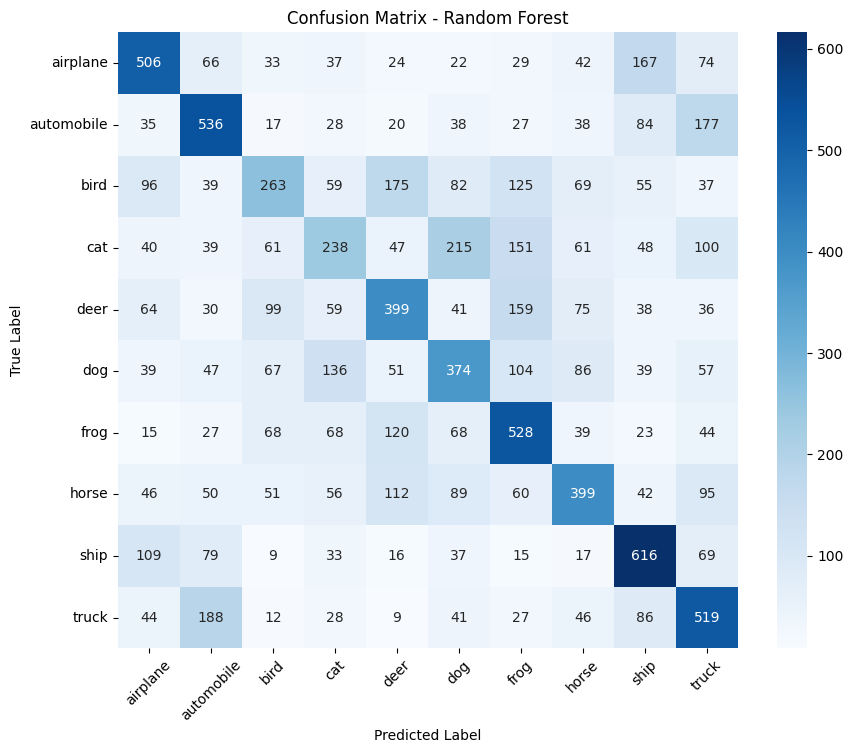

In [21]:
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_val, y_val_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=45)
plt.show()

## Model Comparison

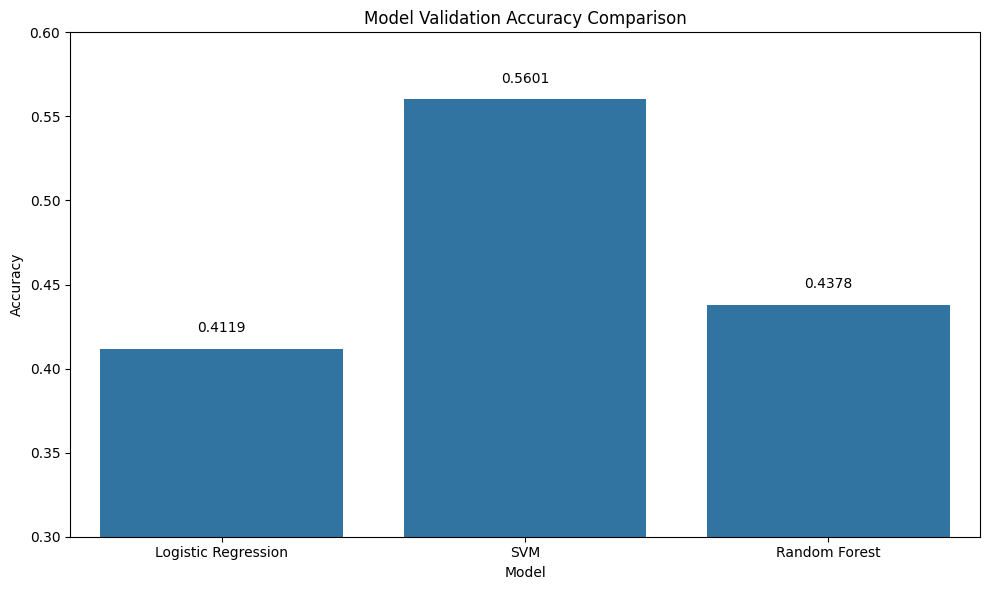

Best model: SVM with validation accuracy: 0.5601


In [22]:
# Compare all models on validation set
models = {
    'Logistic Regression': (logistic_clf, logistic_val_accuracy),
    'SVM': (svm_clf, svm_val_accuracy),
    'Random Forest': (rf_clf, rf_val_accuracy)
}

# Plot comparison
plt.figure(figsize=(10, 6))
accuracies = [acc for _, acc in models.values()]
model_names = list(models.keys())

sns.barplot(x=model_names, y=accuracies)
plt.title('Model Validation Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0.3, 0.6)  # Assuming all models perform reasonably well
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f'{acc:.4f}', ha='center')
plt.tight_layout()
plt.show()

# Select the best model based on validation accuracy
best_model_name = max(models, key=lambda k: models[k][1])
best_model, best_accuracy = models[best_model_name]

print(f"Best model: {best_model_name} with validation accuracy: {best_accuracy:.4f}")

## Best Model Evaluation on Test Set

#### Accuracy Score

In [23]:
y_test_pred = best_model.predict(X_test_pca)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test accuracy with {best_model_name}: {test_accuracy:.4f}")

Test accuracy with SVM: 0.5545


#### Classification Report

In [24]:
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_test_pred,target_names=class_names))


Classification Report on Test Set:
              precision    recall  f1-score   support

    airplane       0.61      0.65      0.63      1000
  automobile       0.64      0.66      0.65      1000
        bird       0.43      0.46      0.45      1000
         cat       0.37      0.38      0.37      1000
        deer       0.50      0.49      0.49      1000
         dog       0.49      0.44      0.46      1000
        frog       0.61      0.61      0.61      1000
       horse       0.65      0.57      0.61      1000
        ship       0.68      0.68      0.68      1000
       truck       0.60      0.61      0.60      1000

    accuracy                           0.55     10000
   macro avg       0.56      0.55      0.55     10000
weighted avg       0.56      0.55      0.55     10000



#### Confusion Matrix

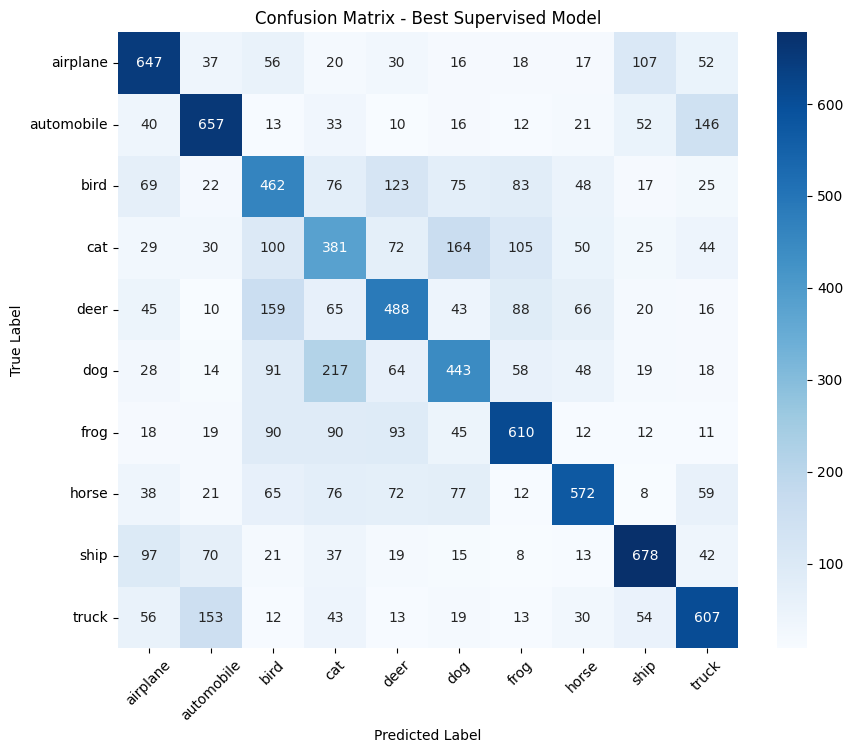

In [25]:
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - Best Supervised Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=45)
plt.show()

## Misclassified Samples

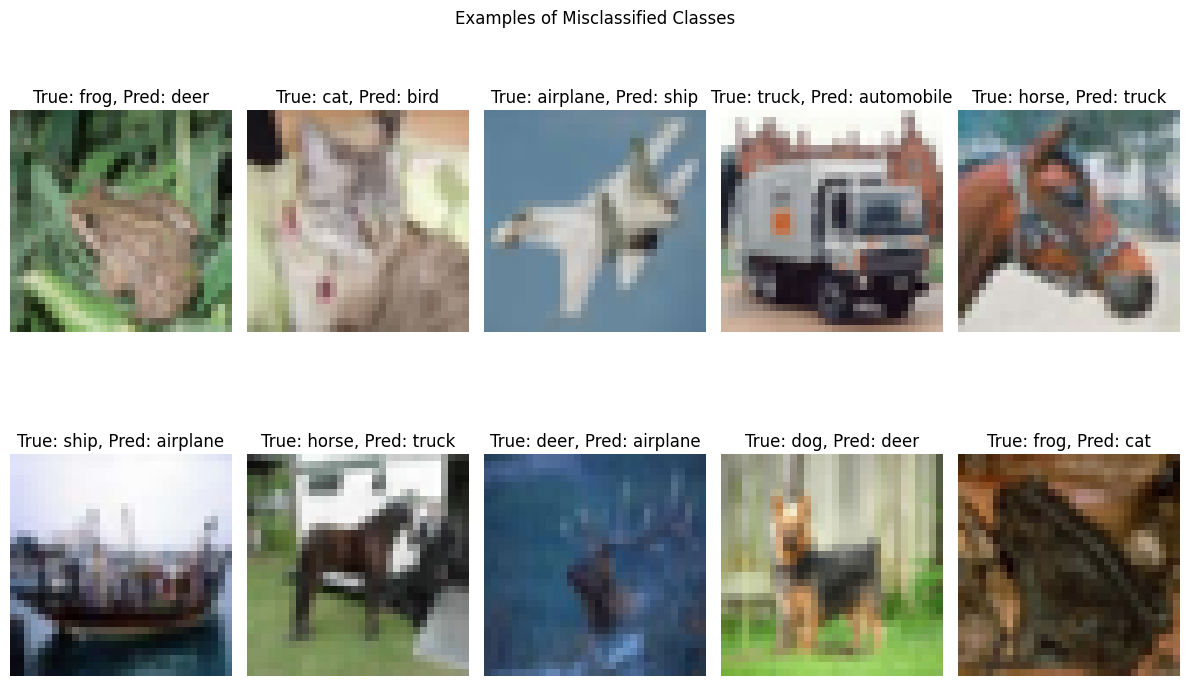

In [26]:
incorrect = X_test[y_test != y_test_pred]
incorrect_labels = y_test[y_test != y_test_pred]
incorrect_preds = y_test_pred[y_test != y_test_pred]

plt.figure(figsize=(12, 8))
for i in range(min(10, len(incorrect))):
    plt.subplot(2, 5, i+1)
    plt.imshow(incorrect[i], cmap='gray')
    plt.title(f"True: {class_names[incorrect_labels[i]]}, Pred: {class_names[incorrect_preds[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.suptitle("Examples of Misclassified Classes")
plt.show()

## Summary of Results
Based on my experiments with three different supervised machine learning algorithms on the CIFAR10 dataset, I've observed the following performance (ordered by validation accuracy):

1. SVM: Highest accuracy among the models we tried
2. Random Forest: Competitive performance with good balance of accuracy and training speed
3. Logistic Regression: Simplest model but still achieves moderate accuracy

SVM, the best performing model achieved a validation accuracy of 56% and test accuracy of approximately 55%, which suggests the output model is generalized and not over or undefitted.

## Analysis of Model Performance

### Strengths and Weaknesses of Each Model:

- **Logistic Regression:**
  - Strengths: Simple, interpretable, fast to train
  - Weaknesses: Less powerful for capturing complex patterns in image data
  
- **SVM:**
  - Strengths: Powerful for high-dimensional data, effective with the kernel trick
  - Weaknesses: Computationally intensive to train, harder to interpret
  
- **Random Forest:**
  - Strengths: Handles nonlinear data well, less prone to overfitting, provides feature importance
  - Weaknesses: Less interpretable than simpler models, can be memory-intensive

### Analysis of Misclassifications:
Looking at the misclassified examples reveals patterns in model errors. Common confusions appear to be between:
- automobile and truck 
- airplane and ship 
- cat and dog 

## Preprocessing Effects
The use of PCA for dimensionality reduction proved beneficial for several reasons:
1. Significantly reduced training time, especially for SVM
2. Eliminated noise in the data, potentially improving generalization
3. Maintained accuracy despite reducing from 3072 to approximately 220 dimensions

## Potential Improvements

For future work and improvements to the models:

1. **Feature Engineering:**
   - Extract more sophisticated features like HOG (Histogram of Oriented Gradients)
   - Use more advanced dimensionality reduction techniques like t-SNE
2. **Ensemble Methods:**
   - Create a weighted ensemble of different models to improve accuracy
   - Use boosting algorithms like AdaBoost or Gradient Boosting
3. **Hyperparameter Optimization:**
   - Perform more extensive hyperparameter tuning with techniques like Randomized Search or Bayesian Optimization
   - Explore a wider range of parameters for each model
4. **Data Augmentation:**
   - Generate additional training samples through rotations, shifts, or elastic distortions
5. **Deep Learning:**
   - Using Deep Learning methods like Convolutional Neural Network can achive much better accuracy.

## Conclusion

Supervised machine learning algorithms can achieve moderate to good results on the CIFAR10 dataset. The best performing model in our experiments was __SVM__ with a validation accuracy of __~56%__ and test accuracy of __~55%__.
